In [19]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import torch
from utilities import *
from VoxelGrid import *
import os


os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
device='cuda' if torch.cuda.is_available() else 'cpu'


In [20]:
model="mic"
dataset= "../nerf_synthetic/" + model
focal, all_c2w, all_gt = get_data(dataset, "train")

100%|█████████████████████████████████████████| 100/100 [00:01<00:00, 62.07it/s]


In [21]:
back_focal, back_c2w, back_gt = get_data(dataset, "train", True)

100%|█████████████████████████████████████████| 100/100 [00:01<00:00, 95.60it/s]


In [22]:
red = 4
target_ims_carve, rays_carve = reduce_data(back_c2w, back_gt.squeeze(), back_focal, red)
red = 4
target_ims, rays = reduce_data(all_c2w, all_gt, focal, red)
red = 4
disp_ims, disp_rays = reduce_data(all_c2w, all_gt, focal, red)


In [23]:
D_carve = RayDataset(target_ims_carve, rays_carve, device)
train_loader_carve = torch.utils.data.DataLoader(D_carve, batch_size=5000, shuffle=False)

100%|█████████████████████████████████████████| 100/100 [00:17<00:00,  5.80it/s]


In [24]:
D = RayDataset(target_ims, rays, device)
train_loader = torch.utils.data.DataLoader(D, batch_size=5000, shuffle=True)

100%|█████████████████████████████████████████| 100/100 [00:11<00:00,  8.68it/s]


In [25]:
VG = VoxelGridSphericalCarve(128, 1.4, 40, 9)

In [26]:
carve(VG, train_loader_carve, 900)

  0%|                                                   | 0/800 [00:00<?, ?it/s]


RuntimeError: CUDA out of memory. Tried to allocate 30.00 MiB (GPU 0; 4.94 GiB total capacity; 708.15 MiB already allocated; 11.38 MiB free; 732.00 MiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [ ]:
color_sph_base(VG, train_loader, 900)

In [470]:
losses=[]


In [436]:
VG.opacities.max()

tensor(1000., device='cuda:0', grad_fn=<MaxBackward1>)

In [469]:
VG.load('wip_carve.obj')
#with torch.no_grad():
  #  VG.opacities[VG.opacities!=0]=40

In [471]:
train_carve_color(VG, train_loader, 900, 0.9)


100%|█████████████████████████████████████████| 800/800 [00:34<00:00, 22.87it/s]


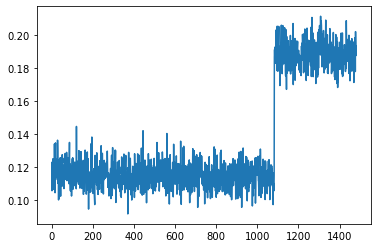

In [457]:
plt.plot(rolling_average(np.array(losses),1))

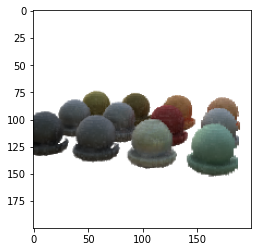

In [468]:
im1 = VG.render_large_image_from_rays(disp_rays[1],(900, 1.2))
plt.imshow(im1)

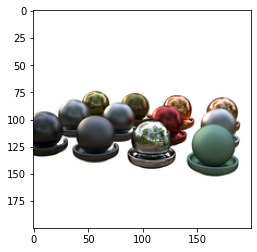

In [441]:
im3 = disp_ims[1]
plt.imshow(im3)

In [189]:
len(np.array(losses))

8000

In [432]:
#VG.save('materials_sph.obj')
10*np.log( 1/((im1-im3)**2).mean())/np.log(10)

21.906254875772063

# PSNR

In [433]:
VG.smooth_colors()

In [417]:
test_focal, test_c2w, test_gt = get_data("../nerf_synthetic/" + model, "test")

100%|█████████████████████████████████████████| 200/200 [00:03<00:00, 53.12it/s]


In [424]:
red = 8
disp_ims_test, disp_rays_test = reduce_data(test_c2w, test_gt,test_focal, red)
disp_im_w = disp_ims_test[0].shape[0]

In [434]:
print(compute_psnr(VG, disp_rays_test, disp_ims_test, 900))

100%|█████████████████████████████████████████| 200/200 [00:12<00:00, 15.87it/s]

21.570735722533982
